

#  Distribuições contínuas


## O que é uma variável aleatória?

Dentro de um espaço amostral S associado a algum experimento, uma variável aleatória é definida como qualquer regra que assume um número a cada resultado em S. Exemplos:


- Resultado de um lançamento de um dado.
- Altura de um estudante selecionado ao acaso de um colégio.
- Tempo de navegação de um usuário em uma página web.


Usamos letras maiúsculas como $X$ ou $Y$ para denotar variáveis aleatórias.

As variáveis aleatórias são divididas em dois grupos:
as variáveis aleatórias discretas e as variáveis aleatórias contínuas.

Isso será entendido com:

- Lei dos grandes números
- Valor esperado
- Distribuições de probabilidade contínuas

In [1]:
# bibliotecas
import random
import numpy as np
import matplotlib.pyplot as plt


## Jogar um dado muitas vezes ( _Lei dos grandes números_)
Quando jogamos um dado muitas vezes, a média obtida se aproxima de 3.5 que é o valor esperado.

In [2]:
dado = [x for x in range(1,7)]
print("Um dado justo com 6 lados:",dado)

Um dado justo com 6 lados: [1, 2, 3, 4, 5, 6]


In [3]:
def jogar_dado(n=10):
    """
    Jogar um dado justo n vezes e retornar o resultado em uma lista
    """
    r = []
    for _ in range(n):
        r.append(random.choice(dado))
    return np.array(r)

In [4]:
jogar_dado(1)

array([5])

In [5]:
jogar_dado(6)

array([4, 4, 4, 3, 3, 5])

In [6]:
for i in [1,5,10,50,100,500,1000,5000,10000]:
    print("Média de {} dados jogados: {}".format(i,round(jogar_dado(i).mean(),2)))

Média de 1 dados jogados: 1.0
Média de 5 dados jogados: 3.6
Média de 10 dados jogados: 4.3
Média de 50 dados jogados: 3.58
Média de 100 dados jogados: 3.53
Média de 500 dados jogados: 3.41
Média de 1000 dados jogados: 3.42
Média de 5000 dados jogados: 3.51
Média de 10000 dados jogados: 3.5


## Valor esperado de uma função contínua

__Valor esperado ou média__: a média ponderada dos possíveis valores, usando as probabilidades como pesos, caso discreto.

Seja $X$ uma variável aleatória com um número finito de possibilidades $x_1$,$x_2$,$x_3$,... ocorrendo com as probabilidades $p_1$,$p_2$,$p_3$,... respectivamente. A esperança de $X$ é:

$$ E[X]=\sum_{i=1}^{k}x_{i}\,p_{i}=x_{1}p_{1}+x_{2}p_{2}+\cdots +x_{k}p_{k} $$

Como, todas as probabilidades $p_1$, $p_2$, $p_3$, somam em 1, $p_1+p_2+p_3+...=1$, este é a  **média ponderada**.

Para, distribuições contínuas de probabilidade, com uma função de densidade (PDF) de $f(x)$, o valor esperado é,

$$ {\displaystyle \operatorname {E} [X]=\int _{\mathbb {R} }xf(x)\,dx.}$$

### Vamos calcular o valor esperado da função $P(x)=x.e^{-x}$ entre $x=0$ e $x=\infty$

O que queremos, é calcular:
$$ \int _{0}^{\infty}x.P(x).dx = \int _{0}^{\infty}x.[x.e^{-x}].dx = \int _{0}^{\infty}x^2.e^{-x}.dx$$

In [7]:
def func(x):
    import numpy as np
    return x*np.exp(-x)

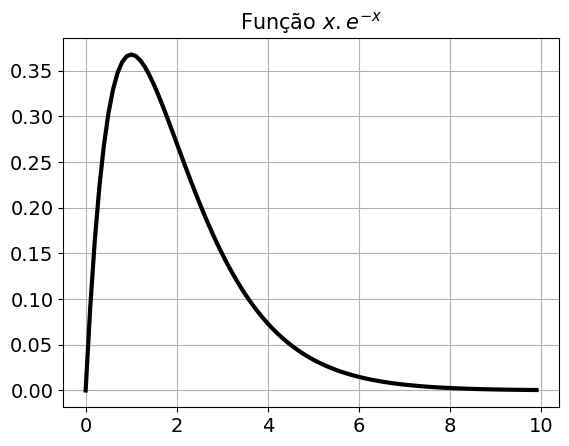

In [8]:
x = np.arange(0,10,0.1)
y = func(x)
plt.plot(x,y,color='k',lw=3)
plt.title("Função $x.e^{-x}$",fontsize=15)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Usar `scipy.integrate`
Vamos aumentando o limite superior da integral gradualmente para ver que a integral não muda muito a partir de um certo ponto.

In [9]:
import scipy.integrate

In [10]:
result_integral=[]
for i in range(1,11):
    integral=scipy.integrate.quad(func,0,i)[0]
    result_integral.append(integral)
    print("O valor da integral para o limite superior de {} é : {}".format(i,integral))

O valor da integral para o limite superior de 1 é : 0.2642411176571154
O valor da integral para o limite superior de 2 é : 0.593994150290162
O valor da integral para o limite superior de 3 é : 0.8008517265285442
O valor da integral para o limite superior de 4 é : 0.9084218055563291
O valor da integral para o limite superior de 5 é : 0.9595723180054871
O valor da integral para o limite superior de 6 é : 0.9826487347633355
O valor da integral para o limite superior de 7 é : 0.9927049442755638
O valor da integral para o limite superior de 8 é : 0.9969808363488774
O valor da integral para o limite superior de 9 é : 0.9987659019591333
O valor da integral para o limite superior de 10 é : 0.9995006007726127


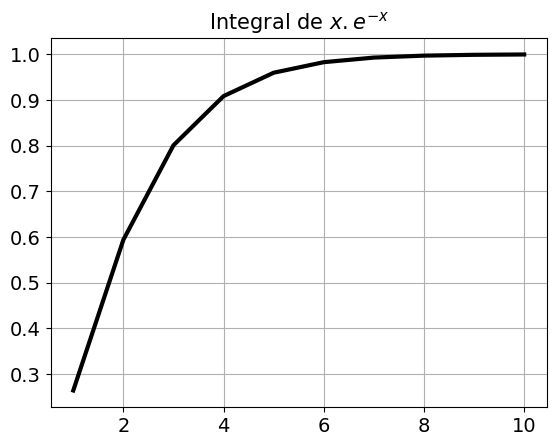

In [11]:
plt.plot(range(1,11),result_integral,color='k',lw=3)
plt.title("Integral de $x.e^{-x}$",fontsize=15)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [12]:
def valor_esperado(x):
    return x*func(x)

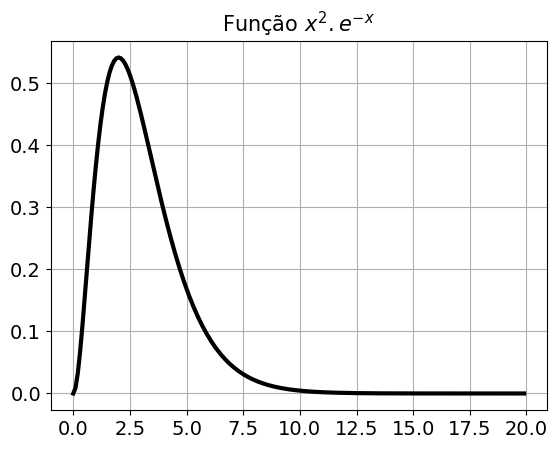

In [13]:
x = np.arange(0,20,0.1)
y = valor_esperado(x)
plt.plot(x,y,color='k',lw=3)
plt.title("Função $x^2.e^{-x}$",fontsize=15)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [14]:
result_integral=[]
for i in range(1,11):
    integral=scipy.integrate.quad(valor_esperado,0,i)[0]
    result_integral.append(integral)
    print("O valor da integral para o limite superior de {} é : {}".format(i,integral))

O valor da integral para o limite superior de 1 é : 0.16060279414278839
O valor da integral para o limite superior de 2 é : 0.6466471676338731
O valor da integral para o limite superior de 3 é : 1.1536198377463132
O valor da integral para o limite superior de 4 é : 1.5237933888929112
O valor da integral para o limite superior de 5 é : 1.7506959610338377
O valor da integral para o limite superior de 6 é : 1.8760623911666823
O valor da integral para o limite superior de 7 é : 1.9407276722389566
O valor da integral para o limite superior de 8 é : 1.972492064511994
O valor da integral para o limite superior de 9 é : 1.9875356097872454
O valor da integral para o limite superior de 10 é : 1.9944612085689766


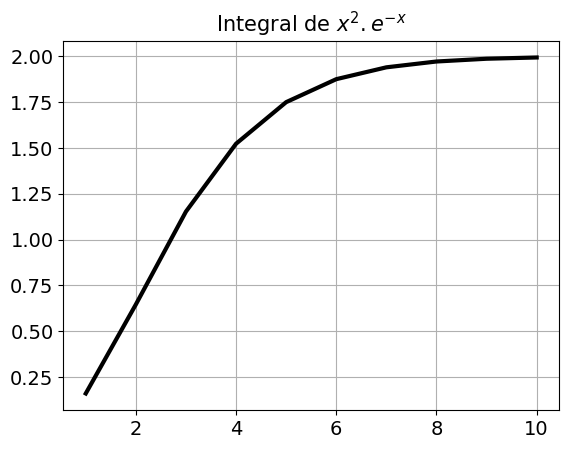

In [15]:
plt.plot(range(1,11),result_integral,color='k',lw=3)
plt.title("Integral de $x^2.e^{-x}$",fontsize=15)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Distribuições contínuas
__Distribuição de Probabilidade contínua__ (aplicável onde a variável aleatória será um número do conjunto dos reais, como a temperatura em um dado dia) é chamada também de função de densidade de probabilidade (com a probabilidade de um valor específico é sempre 0)

### Algumas terminologias

* __Moda__: para uma variável aleatória discreta, o valor com maior probabilidade (o local em que a função de massa de probabilidade tem seu pico); para uma variável aleatória contínua, um local no qual a função de densidade de probabilidade tem um pico local.
* __Head__: a faixa de valores onde o pmf ou pdf é relativamente alto.
* __Tail__: o complemento da head; o grande conjunto de valores onde o pmf ou pdf é relativamente baixo.
* __Valor esperado ou média__: a média ponderada dos valores possíveis, utilizando suas probabilidades como pesos; ou o seu análogo contínuo.
* __Mediana__: o valor tal que o conjunto de valores menor que a mediana e o conjunto maior que a mediana tenham, cada um, probabilidades não maiores que a metade.
* __Variância__: o segundo momento do pmf ou pdf sobre a média; uma medida importante da dispersão da distribuição.
* __Desvio padrão__: a raiz quadrada da variância e, portanto, outra medida de dispersão.

* __Simetria__: uma propriedade de algumas distribuições em que a parte da distribuição à esquerda de um valor específico é uma imagem espelhada da parte à sua direita.
* __Distorção (Skewness)__: uma medida da extensão em que um PMF ou PDF "inclina-se" para um lado de sua média. O terceiro momento padronizado da distribuição.
* __Curtose (Kurtosis)__: uma medida da "gordura" das caudas de um pmf ou pdf. O quarto momento padronizado da distribuição.

![kurtosis](https://anotherbloodybullshitblog.files.wordpress.com/2016/01/normal-not-always-the-norm.gif?w=809)

### Definições matemáticas rápidas de média, variância, assimetria e curtose em relação a um PDF $P(x)$

$$\text{1º momento } \mathbf{Média:} \int x.P(x).dx$$

$$\text{2º momento } \mathbf{Variância:} \int (x-\mu)^2.P(x).dx$$

$$\text{Pearson's 3º momento  }\mathbf{Distorção:} \int\left ( \frac{x-\mu}{\sigma} \right )^3.P(x).dx$$

$$\text{Pearson's 4º momento  }\mathbf{Curtose:} \int\left ( \frac{x-\mu}{\sigma} \right )^4.P(x).dx$$

## Distribuição Uniforme (constante)

Esta é a distribuição da probabilidade de selecionar aleatoriamente e uniformemente um item de uma coleção finita.

Estamos mais familiarizados com a versão descontínua desta distribuição. Por exemplo, no caso de lançamento de um dado justo, a distribuição de probabilidade de um único lançamento é dada po

$$ \left \{ \frac{1}{6},\ \frac{1}{6}, \ \frac{1}{6},\ \frac{1}{6},\ \frac{1}{6},\ \frac{1}{6} \right \} $$


Para o caso contínuo:

$$ f(x)={\begin{cases}{\frac {1}{b-a}}&\mathrm {for} \ a\leq x\leq b,\\[8pt]0&\mathrm {for} \ x<a\ \mathrm {or} \ x>b\end{cases}} $$
![uniform](https://raw.githubusercontent.com/tirthajyoti/Stats-Maths-with-Python/master/images/uniform_dist.PNG)r:

### Gerando dados aleatórios (entre 0 e 1)

In [16]:
from scipy.stats import uniform

In [17]:
uniform.rvs(size=5)

array([0.90820754, 0.61633702, 0.32422025, 0.97673466, 0.28418291])

### Mudando `loc` e `scale` podemos mover o range

In [18]:
# Floats aleatórios entre -10 e 0
uniform.rvs(loc=-10,scale=10,size=5)

array([-7.97155268, -5.75870024, -6.50061157, -9.35866419, -4.93008415])

In [19]:
# Floats aleatórios entre -10 e +10
uniform.rvs(loc=-10,scale=20,size=5)

array([6.6847669 , 1.83636453, 1.27061816, 1.24139998, 6.87522765])

## Distribuição Normal (Gaussiana)

Na teoria das probabilidades, a distribuição normal é uma distribuição de probabilidade contínua muito comum. Elas são importantes em muitos casos.

As grandezas físicas que se espera serem a soma de muitos processos independentes (como erros de medição) geralmente têm distribuições quase normais. Além disso, muitos resultados e métodos (como propagação de incerteza e ajuste de parâmetros de mínimos quadrados) podem ser derivados analiticamente de forma explícita quando as variáveis relevantes são normalmente distribuídas.

A PDF é dada por:
$$ f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}} $$
onde,
- $\mu$ é a média ou valor esperado da distribuição
- $\sigma$ é o desvio padrão

A CDF é dada por:
$$\frac{1}{2}\left [ 1+\text{erf} \left ( \frac{x-\mu}{\sigma\sqrt{2}}\right ) \right ]$$

![normal](https://raw.githubusercontent.com/tirthajyoti/Stats-Maths-with-Python/master/images/normal.PNG)

Página Scipy Stats: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm

In [20]:
from scipy.stats import norm

Text(0, 0.5, 'Densidade de Probabilidade')

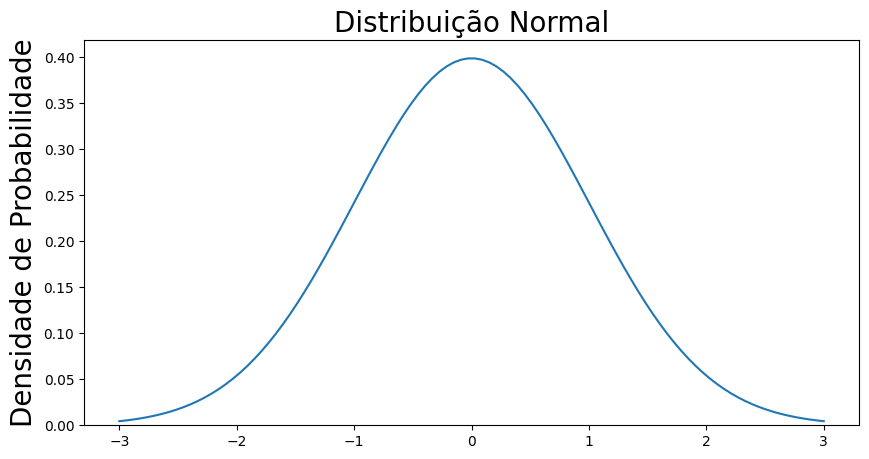

In [21]:
x = np.linspace(-3, 3, num = 100)
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0)

fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(x, pdf_normal_distribution);
ax.set_ylim(0);
ax.set_title('Distribuição Normal', size = 20);
ax.set_ylabel('Densidade de Probabilidade', size = 20)

### Regra 68-95-99.7

In [22]:
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )# Integrando a PDF de -1 até 1

def integrate_normal(num_sigma):
    result, _ = scipy.integrate.quad(normalProbabilityDensity, -num_sigma, num_sigma, limit = 1000)
    return round(result,3)

In [23]:
print("A porcentagem dos dados com 1 desvio padrão:",integrate_normal(0.5))
print("A porcentagem dos dados com 1 desvio padrão:",integrate_normal(1))
print("A porcentagem dos dados com 2 desvio padrão:",integrate_normal(2))
print("A porcentagem dos dados com 3 desvio padrão:",integrate_normal(3))
print("A porcentagem dos dados com 3 desvio padrão:",integrate_normal(4))

A porcentagem dos dados com 1 desvio padrão: 0.383
A porcentagem dos dados com 1 desvio padrão: 0.683
A porcentagem dos dados com 2 desvio padrão: 0.954
A porcentagem dos dados com 3 desvio padrão: 0.997
A porcentagem dos dados com 3 desvio padrão: 1.0


## Gerando variáveis aleatórias com `Numpy.random`

Numpy oferece muitas funções para gerar coisas aleatórias, levando em conta as distribuições de probabilidades que queremos utilizar, como:

- Normal
- Uniforme
- Binomial
- Chi-quadrado
- Poisson
- Distribuição F e Distribuição t de Student

### Gerando números normalmente distribuídos com várias médias e desvios padrão
`numpy.random.normal`, o `loc` representa a média, e `scale` o desvio padrão

In [24]:
a1 = np.random.normal(loc=3,scale=np.sqrt(0.2),size=100000)
a2 = np.random.normal(loc=0,scale=1.0,size=100000)
a3 = np.random.normal(loc=0,scale=np.sqrt(5),size=100000)
a4 = np.random.normal(loc=-2,scale=np.sqrt(0.5),size=100000)

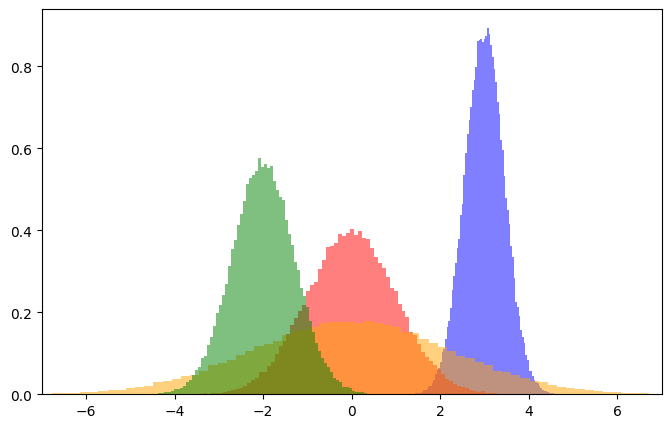

In [25]:
plt.figure(figsize=(8,5))
plt.hist(a1,density=True,bins=100,color='blue',alpha=0.5)
plt.hist(a2,density=True,bins=100,color='red',alpha=0.5)
plt.hist(a3,density=True,bins=100,color='orange',alpha=0.5)
plt.hist(a4,density=True,bins=100,color='green',alpha=0.5)
plt.xlim(-7,7)
plt.show()

## Distribuição Chi-quadrado ($\chi^2$) como a soma de variáveis normalmente distribuídas

Em estatística, a distribuição chi-quadrado com _k_ graus de liberdade é uma distribuição de uma soma de quadrados de _k_ variáveis independentes normalmente padronizadas.

Muito usada em inferência, para teste de hipóteses e intervalos de confiança.

A PDF da distribuição chi-quadrado é:

$$ f(x;\,k)={\begin{cases}{\dfrac {x^{{\frac {k}{2}}-1}e^{-{\frac {x}{2}}}}{2^{\frac {k}{2}}\Gamma \left({\frac {k}{2}}\right)}},&x>0;\\0,&{\text{outros}}.\end{cases}} $$

onde $\Gamma({k/2})$ é a função gamma, que possui valores fechados para os inteiros $k$.

In [26]:
np.random.chisquare(df=3,size=10)

array([2.46221499, 1.74856622, 1.82314099, 5.59388331, 2.99749331,
       4.80885899, 4.24151633, 1.2872155 , 3.78985851, 1.86687226])

In [27]:
def sum_normal(k,num_experiments=100):
    dist = []
    for i in range(num_experiments):
        total = 0
        for i in range(k):
            total+=(float(np.random.normal()))**2
        dist.append(total)
    return np.array(dist)

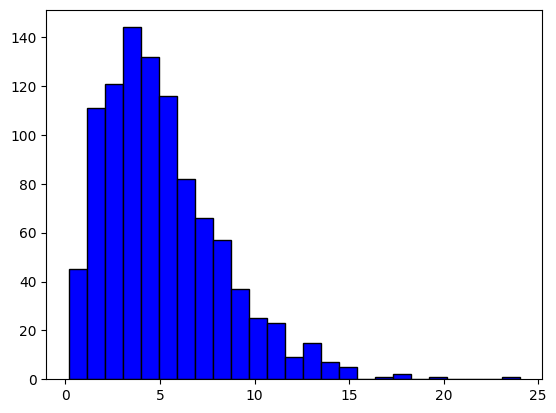

In [28]:
a1 = np.random.chisquare(df=5,size=1000)
plt.hist(a1,bins=25,edgecolor='k',color='blue')
plt.show()

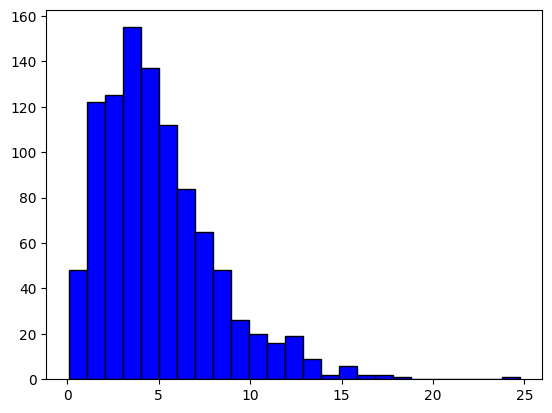

In [29]:
a2 = sum_normal(k=5,num_experiments=1000)
plt.hist(a2,bins=25,edgecolor='k',color='blue')
plt.show()

## Distribuição t de Student

Em estatística, a distribuição t de Student (ou distribuição t) é um membro da família de distribuições de probabilidade contínuas que aparece quando estimamos a média de uma população normalmente distribuída, onde temos uma amostra muito pequena e o desvio padrão da população é desconhecido, foi desenvolvida por   [William Sealy Gosset](https://en.wikipedia.org/wiki/William_Sealy_Gosset) com o pseudônimo Student.

Usada muito na inferência, como teste de hipótese e intervalos de confiança.

A distribuição é dada por:

$$ f(t)={\frac {\Gamma ({\frac {\nu +1}{2}})}{{\sqrt {\nu \pi }}\,\Gamma ({\frac {\nu }{2}})}}\left(1+{\frac {t^{2}}{\nu }}\right)^{\!-{\frac {\nu +1}{2}},\!} $$

onde $\nu$ é o número de graus de liberdade e $\Gamma$ é a função gamma.


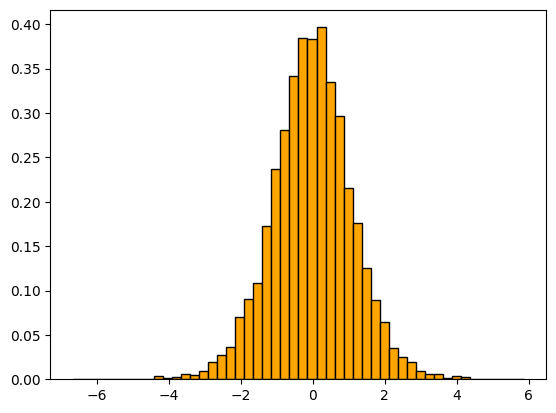

In [30]:
a1=np.random.standard_t(10,size=10000)
plt.hist(a1,bins=50,edgecolor='k',color='orange',density=True)
plt.show()

# Distribuição Normal: Exemplo 1

Suponha que uma máquina de café forneça xícaras de café de 12 gramas. A quantidade real de café colocada na xícara pela máquina varia de acordo com uma distribuição normal, com média igual a 13 gramas e desvio padrão igual a 0,6 gramas. Para cada questão apresentada a seguir, é necessário criar um gráfico destacando a média, sombreando a região correspondente à resposta e calculando a porcentagem associada. ​

​

a. Qual porcentagem de xícaras será preenchida com menos de 12 gramas? ​

b. Qual porcentagem de xícaras será preenchida com mais de 12,5 gramas? ​

c. Qual porcentagem de xícaras terá entre 12 e 13 gramas de café?


In [31]:
from scipy.stats import norm
# Parâmetros da distribuição normal
media = 13
desvio_padrao = 0.6
# Valor que queremos calcular a probabilidade (X<12), (X>12,5), (12<X<13)
valor_limite1 = 12
valor_limite2 = 12.5
valor_limite3 = 13
# Calcula a probabilidade utilizando a função de distribuição acumulada (CDF)
probabilidade1 = norm.cdf(valor_limite1, loc=media, scale=desvio_padrao)*100
probabilidade2 = (1-norm.cdf(valor_limite2, loc=media, scale=desvio_padrao))*100
probabilidade3 = (norm.cdf(13, loc=media, scale=desvio_padrao)-
                  norm.cdf(12, loc=media, scale=desvio_padrao))
# Imprime o resultado
print(f"A porcentagem de xícaras com menos de {valor_limite1} "+
      f"gramas é: {probabilidade1:.1f}")
print(f"A porcentagem de xícaras com mais de {valor_limite2} "+
      f"gramas é: {probabilidade2:.1f}")
print(f"A porcentagem de xícaras entre {valor_limite1} e {valor_limite3} "+
      f"é: {probabilidade3*100:.1f}")

A porcentagem de xícaras com menos de 12 gramas é: 4.8
A porcentagem de xícaras com mais de 12.5 gramas é: 79.8
A porcentagem de xícaras entre 12 e 13 é: 45.2


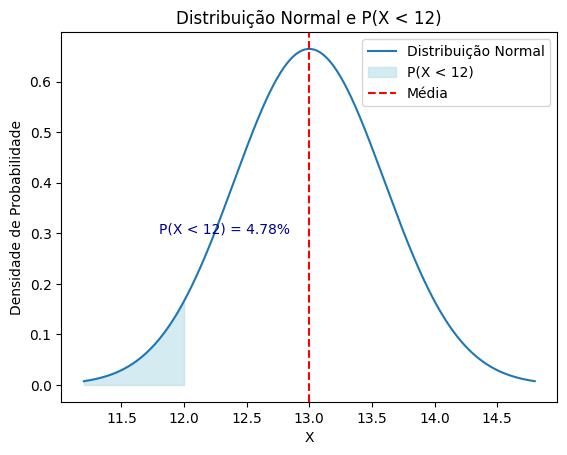

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parâmetros da distribuição normal
media = 13
desvio_padrao = 0.6

# Valor que queremos calcular a probabilidade (X<12)
valor_limite = 12

# Calcula a probabilidade utilizando a função de distribuição acumulada (CDF)
probabilidade = norm.cdf(valor_limite, loc=media, scale=desvio_padrao)

# Gera os dados para o gráfico
x = np.linspace(media - 3 * desvio_padrao, media + 3 * desvio_padrao, 1000)
y = norm.pdf(x, loc=media, scale=desvio_padrao)

# Gráfico da distribuição normal
plt.plot(x, y, label='Distribuição Normal')

# Sombra da região P(X < 12)
x_fill = np.linspace(media - 3 * desvio_padrao, valor_limite, 1000)
y_fill = norm.pdf(x_fill, loc=media, scale=desvio_padrao)
plt.fill_between(x_fill, y_fill, color='lightblue', alpha=0.5, label='P(X < 12)')

# Resaltar a média
plt.axvline(media, color='red', linestyle='--', label='Média')

# Configurar o gráfico
plt.title('Distribuição Normal e P(X < 12)')
plt.xlabel('X')
plt.ylabel('Densidade de Probabilidade')
plt.legend()

# Mostrar a porcentagem
plt.text(11.8, 0.3, f'P(X < 12) = {probabilidade:.2%}', fontsize=10, color='darkblue')

# Mostrar o gráfico
plt.show()


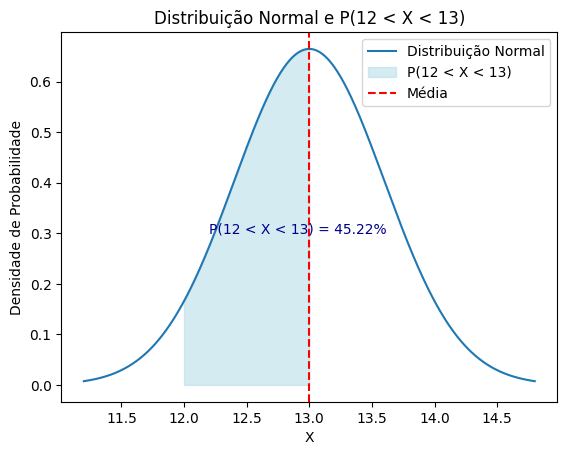

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parâmetros da distribuição normal
media = 13
desvio_padrao = 0.6

# Valores para os límites da região P(12 < X < 13)
limite_inferior = 12
limite_superior = 13

# Calcula as probabilidades utilizando a função de distribuição acumulada (CDF)
probabilidade_inferior = norm.cdf(limite_inferior, loc=media, scale=desvio_padrao)
probabilidade_superior = norm.cdf(limite_superior, loc=media, scale=desvio_padrao)

# Calcula la probabilidad de la región P(12 < X < 13)
probabilidade_regiao = probabilidade_superior - probabilidade_inferior

# Gerar dados para o gráfico
x = np.linspace(media - 3 * desvio_padrao, media + 3 * desvio_padrao, 1000)
y = norm.pdf(x, loc=media, scale=desvio_padrao)

# Gráfico da distribuição normal
plt.plot(x, y, label='Distribuição Normal')

# Sombra da região P(12 < X < 13)
x_fill = np.linspace(limite_inferior, limite_superior, 1000)
y_fill = norm.pdf(x_fill, loc=media, scale=desvio_padrao)
plt.fill_between(x_fill, y_fill, color='lightblue', alpha=0.5, label='P(12 < X < 13)')

# Resaltar a média
plt.axvline(media, color='red', linestyle='--', label='Média')

# Configurar o gráfico
plt.title('Distribuição Normal e P(12 < X < 13)')
plt.xlabel('X')
plt.ylabel('Densidade de Probabilidade')
plt.legend()

# Mostrar a porcentagem
plt.text(12.2, 0.3, f'P(12 < X < 13) = {probabilidade_regiao:.2%}', fontsize=10, color='darkblue')

# Mostrar o gráfico
plt.show()

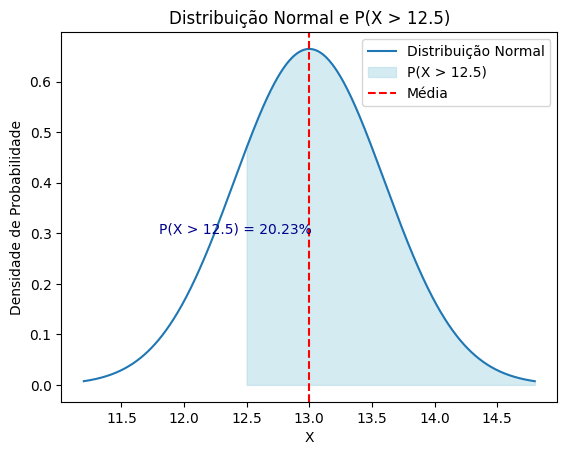

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parâmetros da distribuição normal
media = 13
desvio_padrao = 0.6

# Valor que queremos calcular a probabilidade (X>12.5)
valor_limite = 12.5

# Calcula a probabilidade utilizando a função de distribuição acumulada (CDF)
probabilidade = norm.cdf(valor_limite, loc=media, scale=desvio_padrao)

# Gera os dados para o gráfico
x = np.linspace(media - 3 * desvio_padrao, media + 3 * desvio_padrao, 1000)
y = norm.pdf(x, loc=media, scale=desvio_padrao)

# Gráfico da distribuição normal
plt.plot(x, y, label='Distribuição Normal')

# Sombra da região P(X > 12.5)
x_fill = np.linspace(valor_limite, media + 3 * desvio_padrao, 1000)
y_fill = norm.pdf(x_fill, loc=media, scale=desvio_padrao)
plt.fill_between(x_fill, y_fill, color='lightblue', alpha=0.5, label='P(X > 12.5)')

# Resaltar a média
plt.axvline(media, color='red', linestyle='--', label='Média')

# Configurar o gráfico
plt.title('Distribuição Normal e P(X > 12.5)')
plt.xlabel('X')
plt.ylabel('Densidade de Probabilidade')
plt.legend()

# Mostrar a porcentagem
plt.text(11.8, 0.3, f'P(X > 12.5) = {probabilidade:.2%}', fontsize=10, color='darkblue')

# Mostrar o gráfico
plt.show()

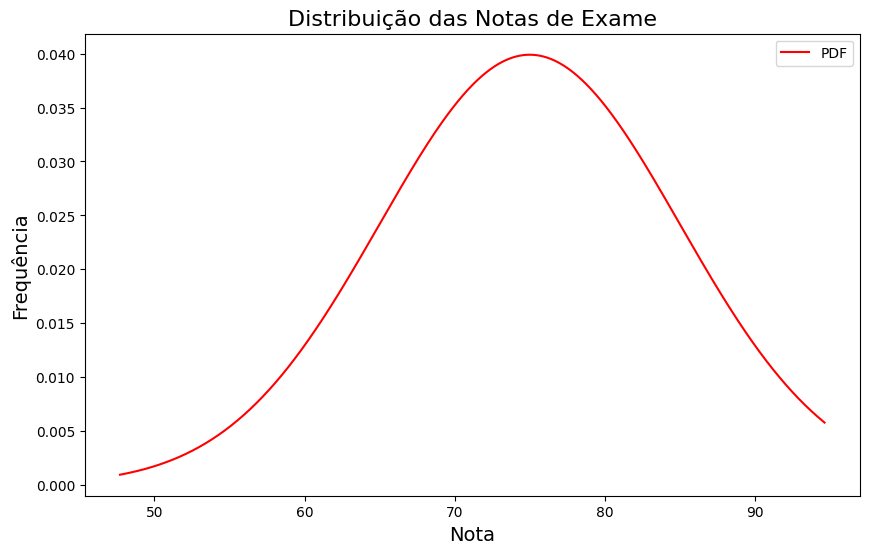

In [35]:
#Exemplo

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parâmetros para a distribuição das notas
media_nota = 75  # Média das notas
desvio_padrao_nota = 10  # Desvio padrão das notas
tamanho_amostra = 200  # Número de alunos

# Gerar dados aleatórios para as notas
notas_exame = np.random.normal(media_nota, desvio_padrao_nota, tamanho_amostra)

# Plotar histograma e PDF
fig, ax = plt.subplots(figsize=(10, 6))
# Plotar PDF
x = np.linspace(min(notas_exame), max(notas_exame), 1000)
pdf = norm.pdf(x, media_nota, desvio_padrao_nota)
ax.plot(x, pdf, color='red', label='PDF')

# Adicionar títulos e rótulos
ax.set_title('Distribuição das Notas de Exame', fontsize=16)
ax.set_xlabel('Nota', fontsize=14)
ax.set_ylabel('Frequência', fontsize=14)
ax.legend()

plt.show()

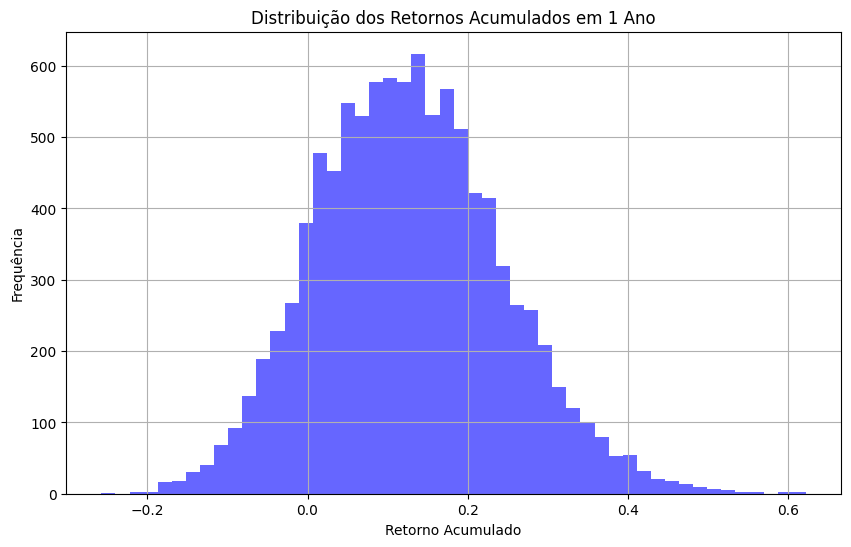

Retorno Esperado: 12.71%
Risco (Desvio Padrão): 11.62%


In [36]:
#Riscos em investimentos

import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do retorno do investimento
media_retorno = 0.01  # Média do retorno mensal (1%)
desvio_padrao_retorno = 0.03  # Desvio padrão do retorno mensal (3%)

# Simular retornos mensais para um ano (12 meses)
num_meses = 12
num_simulacoes = 10000

retornos_simulados = np.random.normal(media_retorno, desvio_padrao_retorno, (num_simulacoes, num_meses))

# Calcular o retorno acumulado para cada simulação, np.prod multiplica todos valores do array
retornos_acumulados = np.prod(1 + retornos_simulados, axis=1) - 1

# Plotar a distribuição dos retornos acumulados
plt.figure(figsize=(10, 6))
plt.hist(retornos_acumulados, bins=50, color='blue', alpha=0.6)
plt.title('Distribuição dos Retornos Acumulados em 1 Ano')
plt.xlabel('Retorno Acumulado')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Calcular métricas de risco e retorno
retorno_esperado = np.mean(retornos_acumulados)
risco = np.std(retornos_acumulados)

print(f'Retorno Esperado: {retorno_esperado:.2%}')
print(f'Risco (Desvio Padrão): {risco:.2%}')

In [37]:
# Dados da amostra de escores dos alunos
escores_alunos = np.array([85, 90, 78, 92, 88, 75, 95, 80, 89, 84, 93, 77, 82, 91, 86])

# Parâmetros conhecidos
media_populacao = 80  # Média dos escores na população
desvio_padrao_populacao = 10  # Desvio padrão dos escores na população

# Calcular pontuações z
pontuacoes_z = (escores_alunos - media_populacao) / desvio_padrao_populacao

# Analisar os resultados
for i, z in enumerate(pontuacoes_z):
    print(f'Aluno {i+1}: Escore = {escores_alunos[i]}, Pontuação Z = {z:.2f}')

# Verificar quantos alunos estão acima da média (pontuação z > 0)
alunos_acima_da_media = np.sum(pontuacoes_z > 0)
print(f'\nNúmero de alunos acima da média: {alunos_acima_da_media}')

Aluno 1: Escore = 85, Pontuação Z = 0.50
Aluno 2: Escore = 90, Pontuação Z = 1.00
Aluno 3: Escore = 78, Pontuação Z = -0.20
Aluno 4: Escore = 92, Pontuação Z = 1.20
Aluno 5: Escore = 88, Pontuação Z = 0.80
Aluno 6: Escore = 75, Pontuação Z = -0.50
Aluno 7: Escore = 95, Pontuação Z = 1.50
Aluno 8: Escore = 80, Pontuação Z = 0.00
Aluno 9: Escore = 89, Pontuação Z = 0.90
Aluno 10: Escore = 84, Pontuação Z = 0.40
Aluno 11: Escore = 93, Pontuação Z = 1.30
Aluno 12: Escore = 77, Pontuação Z = -0.30
Aluno 13: Escore = 82, Pontuação Z = 0.20
Aluno 14: Escore = 91, Pontuação Z = 1.10
Aluno 15: Escore = 86, Pontuação Z = 0.60

Número de alunos acima da média: 11


In [38]:
# Dados da amostra de preços de imóveis (em milhares de reais)
precos_imoveis = np.array([200, 220, 250, 210, 230, 240, 260, 270, 225, 215,
                           235, 245, 255, 275, 265, 280, 290, 210, 220, 230])

# Calcular média e desvio padrão da amostra
media_precos = np.mean(precos_imoveis)
desvio_padrao_precos = np.std(precos_imoveis, ddof=1)

# Preço de referência
preco_referencia = 240  # Preço de referência em milhares de reais

# Calcular a probabilidade de um imóvel ser vendido por menos de 240 mil reais
probabilidade = norm.cdf(preco_referencia, media_precos, desvio_padrao_precos)

print(f'Probabilidade de um imóvel ser vendido por menos de {preco_referencia} mil reais: {probabilidade:.2%}')

Probabilidade de um imóvel ser vendido por menos de 240 mil reais: 48.08%


# Utilizando tabela do Kaggle

https://www.kaggle.com/datasets/jasmeet0516/air-quality

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Carregar o dataset
df = pd.read_csv('./air_quality.csv')


# Mostrar as primeiras linhas do dataset
df.head()



,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3,NaN
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,01/01/2015,1.2,NaN
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6,NaN
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,12/01/2011,8.0,NaN
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,06/01/2022,6.1,NaN


In [40]:
# Filtrar os dados para a medida específica (PM2.5)
pm25_data = df[df['Name'] == 'Fine particles (PM 2.5)']

# Converter a coluna de interesse para valores numéricos
pm25_values = pd.to_numeric(pm25_data['Data Value'], errors='coerce').dropna()

# Calcular estatísticas básicas
media_pm25 = np.mean(pm25_values)
desvio_padrao_pm25 = np.std(pm25_values)

print(f'Média da concentração de PM2.5: {media_pm25:.2f} µg/m³')
print(f'Desvio padrão da concentração de PM2.5: {desvio_padrao_pm25:.2f} µg/m³')

Média da concentração de PM2.5: 9.17 µg/m³
Desvio padrão da concentração de PM2.5: 2.10 µg/m³


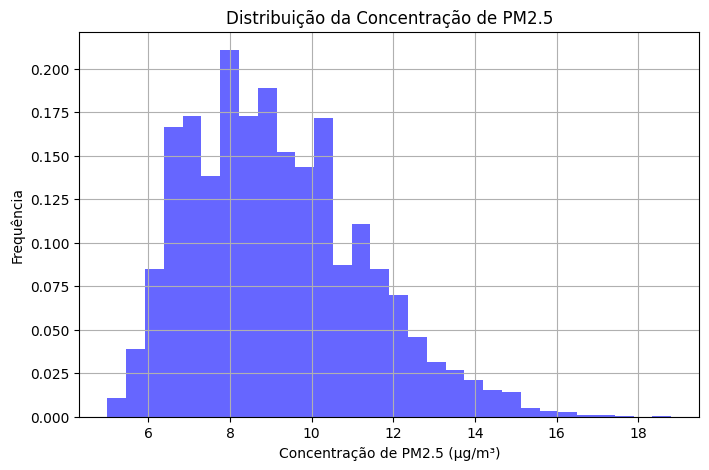

In [41]:


# Plotar a distribuição da concentração de PM2.5
plt.figure(figsize=(8, 5))
plt.hist(pm25_values, bins=30, color='blue', alpha=0.6, density=True)
plt.title('Distribuição da Concentração de PM2.5')
plt.xlabel('Concentração de PM2.5 (µg/m³)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


In [42]:

# Calcular a probabilidade de a concentração de PM2.5 exceder 12 µg/m³
limite_pm25 = 12
probabilidade_exceder_limite = 1 - norm.cdf(limite_pm25, media_pm25, desvio_padrao_pm25)

print(f'Probabilidade de a concentração de PM2.5 exceder {limite_pm25} µg/m³: {probabilidade_exceder_limite:.2%}')

Probabilidade de a concentração de PM2.5 exceder 12 µg/m³: 8.86%


In [43]:
# Calcular o percentil 95 da concentração de PM2.5
percentil_95_pm25 = norm.ppf(0.95, media_pm25, desvio_padrao_pm25)

print(f'Concentração de PM2.5 abaixo da qual 95% das medições caem: {percentil_95_pm25:.2f} µg/m³')


Concentração de PM2.5 abaixo da qual 95% das medições caem: 12.62 µg/m³


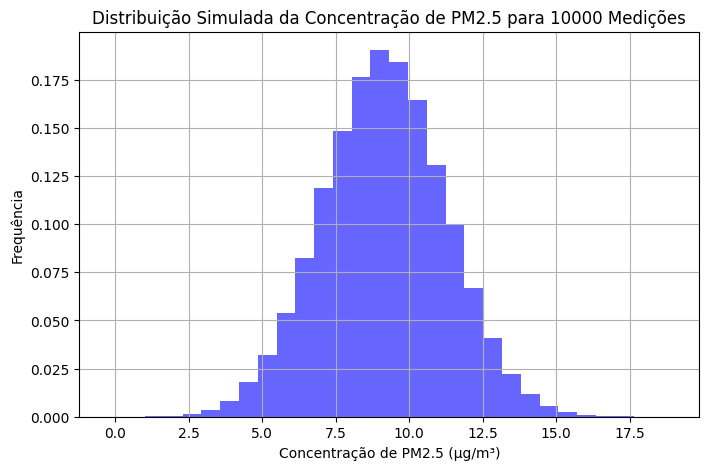

In [44]:

# Simular concentrações de PM2.5 para 10000 medições
num_simulacoes = 100000
pm25_simulados = np.random.normal(media_pm25, desvio_padrao_pm25, num_simulacoes)

# Plotar a distribuição das concentrações simuladas
plt.figure(figsize=(8, 5))
plt.hist(pm25_simulados, bins=30, color='blue', alpha=0.6, density=True)
plt.title('Distribuição Simulada da Concentração de PM2.5 para 10000 Medições')
plt.xlabel('Concentração de PM2.5 (µg/m³)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


In [45]:
# Calcular estatísticas das concentrações simuladas
media_simulada_pm25 = np.mean(pm25_simulados)
desvio_padrao_simulado_pm25 = np.std(pm25_simulados)

print(f'Média simulada da concentração de PM2.5: {media_simulada_pm25:.2f} µg/m³')
print(f'Média da concentração de PM2.5: {media_pm25:.2f} µg/m³')
print(f'Desvio padrão simulado da concentração de PM2.5: {desvio_padrao_simulado_pm25:.2f} µg/m³')
print(f'Desvio padrão da concentração de PM2.5: {desvio_padrao_pm25:.2f} µg/m³')

Média simulada da concentração de PM2.5: 9.15 µg/m³
Média da concentração de PM2.5: 9.17 µg/m³
Desvio padrão simulado da concentração de PM2.5: 2.10 µg/m³
Desvio padrão da concentração de PM2.5: 2.10 µg/m³
